# `Hack the Hacker News!`
[Hacker News](https://news.ycombinator.com/) is a site started by the startup incubator [Y Combinator](https://www.ycombinator.com/), where user-submitted stories (known as "posts") are voted and commented upon, similar to [reddit](https://www.reddit.com/). Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

This project is dedicated to Hacker News' ask & show posts categories. It'll try to analyse all the performance parameters of those two by diving deep into their data.

### The dataset.
You can find the original data set [here](https://www.kaggle.com/hacker-news/hacker-news-posts), but note that the one we're going to be working with has been reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions. 

**Below are descriptions of the columns:**

`id` : The unique identifier from Hacker News for the post

`title` : The title of the post

`url` : The URL that the posts links to, if it the post has a URL

`num_points` : The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes

`num_comments` : The number of comments that were made on the post

`author` : The username of the person who submitted the post

`created_at` : The date and time at which the post was submitted

**Let's begin with the usual preparation of the dataset:**
(link, read, list e.tc.)

In [1]:
# Read dataset.
# --------------------------------------------
# Import reader from module csv, open file and read data file.
from csv import reader
opened_file = open("hacker_news.csv") # create a link to the file
read_file = reader(opened_file)       # reader returns a list

In [2]:
# Create a list of the lists returned by read_file.
hn = list(read_file)

# Extract the header row, save it and then remove it.
headers = hn[0]
print(headers, "\n")
hn = hn[1:]

# Display the first 5 rows.
for row in hn[:5]:
    print(row, "\n")

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'] 

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'] 

['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'] 

['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'] 

['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'] 

['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12'] 



### Our target
We're specifically interested in posts whose titles begin with either Ask HN or Show HN:

- Users submit Ask HN posts to ask the Hacker News community a specific question, like:

>**Ask HN**: How to improve my personal website?

>**Ask HN**: Am I the only one outraged by Twitter shutting down share counts?

>**Ask HN**: Aby recent changes to CSS that broke mobile?

- Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting, like:

>**Show HN**: Wio Link  ESP8266 Based Web of Things Hardware Development Platform'

>**Show HN**: Something pointless I made

>**Show HN**: Shanhu.io, a programming playground powered by e8vm

**Filter out the data:**
Since we're only concerned with post titles beginning with Ask HN or Show HN, we'll create new lists of lists containing just the data for those titles.

In [3]:
ask_posts = []    # the posts about "Ask HN".
show_posts = []   # the posts about "Show HN".
other_posts = []  # all the other posts.

# Loop throught each row in hn.
for row in hn:
    title = row[1] # get the title of the post.
    # If the lowercase version of title starts with ask hn,
    #append the row to ask_posts.
    if title.lower().startswith("ask hn"):
        ask_posts.append(row)
    
    # if the lowercase version of title starts with show hn,
    # append the row to show_posts.
    elif title.lower().startswith("show hn"):
        show_posts.append(row)
        
    # else, append the row to other_posts.
    else:
        other_posts.append(row)
        
# Check the number of posts in ask_posts, show_posts, and other_posts.
print("ask_posts # of posts:\t", len(ask_posts))
print("show_posts # of posts:\t", len(show_posts))
print("other_posts # of posts:\t", len(other_posts))

ask_posts # of posts:	 1744
show_posts # of posts:	 1162
other_posts # of posts:	 17194


**Let's checkout which one is receiving more comments on average:**

In [4]:
# Calculate ask_posts total comments & average.
total_ask_comments = 0
for row in ask_posts:
    total_ask_comments += int(row[4])

# Calculate the average.
avg_ask_comments = round(total_ask_comments / len(ask_posts), 2)
print("Ask Posts Details:\nTotal num. of comments: {}, Total Posts {},\nAverage num. of Comments {}\n"
      .format(total_ask_comments, len(ask_posts), avg_ask_comments))

# Calculate show_posts total comments & average.
total_show_comments = 0
for row in show_posts:
    total_show_comments += int(row[4])

# Calculate the average.
avg_show_comments = round(total_show_comments / len(show_posts), 2)
print("Show Posts Details:\nTotal num. of comments: {}, Total Posts {},\nAverage num. of Comments {}\n"
      .format(total_show_comments, len(show_posts), avg_show_comments))


Ask Posts Details:
Total num. of comments: 24483, Total Posts 1744,
Average num. of Comments 14.04

Show Posts Details:
Total num. of comments: 11988, Total Posts 1162,
Average num. of Comments 10.32



### Which receiving more comments on average?
According to the previous snippet, "Ask HN" posts is receiving more comments. More presicely, it recieves 27% more comments than "Show HN" posts.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Display average comments in a horizontal bar plot**

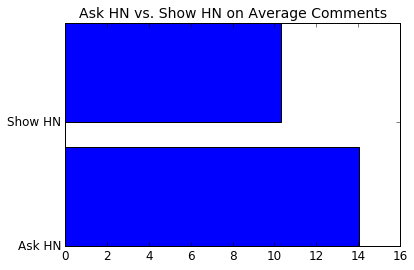

In [6]:
# The dataset
height = [avg_ask_comments, avg_show_comments]
bars = ("Ask HN", "Show HN")
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis and set fontsize in both axes
plt.yticks(y_pos, bars, fontsize=12)
plt.xticks(fontsize=12)
# Add the main title
plt.title("Ask HN vs. Show HN on Average Comments", fontsize=14)

# Show graphic
plt.show()


Next, we'll determine if ask posts created at a certain time are more likely to attract comments. We'll use the following steps to perform this analysis:

1. Calculate the amount of ask posts created in each hour of the day, along with the number of comments received.


2. Calculate the average number of comments ask posts receive by hour created.

In [7]:
import datetime as dt

result_list = [] # a list of lists.
# Loop over ask_posts and append to result_list a list with two elements:
for row in ask_posts:
    # 1: created_at, 2: num_comments
    elements = [row[6], int(row[4])]
    result_list.append(elements)
    
print(result_list[:5], "...", "\n")

counts_by_hour = {}
comments_by_hour = {}

# Loop over lists (datetime, comments) in result_list.
for item in result_list:
    # extract the datetime string from the list
    dt_string = item[0]
    
    # create a datetime object from the previous string with the format
    # as presented in the string: "'11/22/2015 13:43" (mm/dd/yyyy HH:MM)
    dt_object = dt.datetime.strptime(dt_string, "%m/%d/%Y %H:%M")
    
    # Select just the hour from the datetime object.
    hourOnly = dt_object.strftime("%H")

    # Add hour as a key in the dictionary
    if hourOnly not in counts_by_hour:
        # add hour as a key in counts_by_hour and with value = 1.
        counts_by_hour[hourOnly] = 1
        # add hour as a key in comments_by_hour and with value = comments.
        comments_by_hour[hourOnly] = item[1] # 
    else:
        # just increase the counter value by 1.
        counts_by_hour[hourOnly] += 1
        # and add the number of comments to value of comments_by_hour.
        comments_by_hour[hourOnly] += item[1] # 

# Printed in ascending order by hours:
print("Ask posts during each hour of the day:")
for key in sorted(counts_by_hour):
    print("%s: %s" % (key, counts_by_hour[key]))

print("\nTotal comments recieved by Ask posts during each hour of the day:")
for key in sorted(comments_by_hour):
    print("{}: {}".format(key, counts_by_hour[key]))


[['8/16/2016 9:55', 6], ['11/22/2015 13:43', 29], ['5/2/2016 10:14', 1], ['8/2/2016 14:20', 3], ['10/15/2015 16:38', 17]] ... 

Ask posts during each hour of the day:
00: 55
01: 60
02: 58
03: 54
04: 47
05: 46
06: 44
07: 34
08: 48
09: 45
10: 59
11: 58
12: 73
13: 85
14: 107
15: 116
16: 108
17: 100
18: 109
19: 110
20: 80
21: 109
22: 71
23: 68

Total comments recieved by Ask posts during each hour of the day:
00: 55
01: 60
02: 58
03: 54
04: 47
05: 46
06: 44
07: 34
08: 48
09: 45
10: 59
11: 58
12: 73
13: 85
14: 107
15: 116
16: 108
17: 100
18: 109
19: 110
20: 80
21: 109
22: 71
23: 68


In [8]:
# Calculate the average number of comments per post
# for posts created during each hour of the day.
avg_by_hour = []

# loop over the comments dict
for key in comments_by_hour: 
    hour = key # the hour of the day (hour is the key.)

    # the total num of comments for the selected hour.
    num_of_comm = comments_by_hour[hour]
    
    # the total number of posts for the selected hour.
    num_of_posts = counts_by_hour[hour]
    
    avgComm = num_of_comm / num_of_posts
    avg_by_hour.append([hour, round(avgComm, 2)])

print("Average number of comments per \"Ask\" post per hour of day:")
print(avg_by_hour)

Average number of comments per "Ask" post per hour of day:
[['16', 16.8], ['00', 8.13], ['12', 9.41], ['17', 11.46], ['01', 11.38], ['14', 13.23], ['18', 13.2], ['19', 10.8], ['02', 23.81], ['06', 9.02], ['09', 5.58], ['15', 38.59], ['20', 21.52], ['03', 7.8], ['10', 13.44], ['08', 10.25], ['21', 16.01], ['23', 7.99], ['11', 11.05], ['05', 10.09], ['04', 7.17], ['13', 14.74], ['07', 7.85], ['22', 6.75]]


Although we now have the results we need, this format makes it hard to identify the hours with the highest values. Let's finish by sorting the list of lists and printing the five highest values in a format that's easier to read.

In [9]:
# Swapping the hours with the comments
swap_avg_by_hour = []

# Loop through the avg_by_hour
for row in avg_by_hour:
    # Get first the num of comments and second the hour of the day
    # and append it to the list above
    swap_avg_by_hour.append([row[1], row[0]])

# Sort the list and print a sample.
sorted_swap = sorted(swap_avg_by_hour, reverse=True)
print("Top 5 Hours for Ask Post Comments")

# Define 
def find_best_hours(list):
    for avgPost in list:
        hour = avgPost[1] # get the hour.
        avg = avgPost[0]  # get the num of comments.
        
        # Convert the hour string (it's stored as a string in dict)
        # into a datetime object. Use the proper format:
        # e.g. "17" = "%H" because we have only hours.
        hour_dt_Obj = dt.datetime.strptime(hour, "%H")
        
        # Get the hour (and minutes) from the object.
        strTime = hour_dt_Obj.strftime("%H:%M")
        
        print("{}: {:.2f} average comments per post".format(strTime, avg))

find_best_hours(swap_avg_by_hour[:5])

Top 5 Hours for Ask Post Comments
16:00: 16.80 average comments per post
00:00: 8.13 average comments per post
12:00: 9.41 average comments per post
17:00: 11.46 average comments per post
01:00: 11.38 average comments per post


## Which is the best hour, then?
Which hours should you create a post during to have a higher chance of receiving comments? Refer back to the documentation for the data set to convert the times to the time zone you live in.

**The column "created_at"** : The date and time the post was made (the time zone is Eastern Time in the US).

**Answer** : My timezone is +07:00h (Athens) from eastern Time in the US. So, to find the best time for me, I'll add 7, to the current findings:

In [10]:
def find_best_hours_local(list):
    for avgPost in list:
        hour = avgPost[1]
        avg = avgPost[0]
        hour_dt_Obj = dt.datetime.strptime(hour, "%H")
        hour_dt_Obj += dt.timedelta(hours=7)
        strTime = hour_dt_Obj.strftime("%H:%M")
        print("{}: {:.2f} average comments per post".format(strTime, avg))

print("Top 5 Hours for Ask Post Comments (in Athens local time -- +07:00h)")
find_best_hours_local(swap_avg_by_hour[:5])

Top 5 Hours for Ask Post Comments (in Athens local time -- +07:00h)
23:00: 16.80 average comments per post
07:00: 8.13 average comments per post
19:00: 9.41 average comments per post
00:00: 11.46 average comments per post
08:00: 11.38 average comments per post


# The end!!!